# Energy Behavior of Prosumers 

Data is based on data from Kaggle competition: [Enefit - Predict Energy Behavior of Prosumers](https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers).

However, to decrease the size of the dataset we limit the data to only **one district in Estonia**.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data fields
#### target (predicted value)
- **target** - The energy production amount for the hour.

#### solar panels/prosumers characteristics
- **eic_count** - The aggregated number of consumption points (EICs - European Identifier Code).
- **installed_capacity** - Installed photovoltaic solar panel capacity in kilowatts.

#### datetime
- **datetime**

#### weather data
- **_fl** : forecast local
- **_hl** : historical local

In [2]:
DATA_FILE_PATH = 'energy_production_data.csv'

In [3]:
df = pd.read_csv(DATA_FILE_PATH)

In [4]:
df

,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),...,cloudcover_low_fl,cloudcover_mid_fl,cloudcover_total_fl,10_metre_u_wind_component_fl,10_metre_v_wind_component_fl,direct_solar_radiation_fl,surface_solar_radiation_downwards_fl,snowfall_fl,total_precipitation_fl,target
0,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.258819,0.965926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.500000,0.866025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.707107,0.707107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.866025,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.965926,0.258819,...,0.000000,0.000000,0.002670,4.019031,-2.638620,627.675540,255.426670,0.0,0.0,9.685
15304,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.866025,0.500000,...,0.000000,0.000000,0.501343,3.303171,-2.413816,462.511100,132.080000,0.0,0.0,3.365
15305,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,0.707107,...,0.000000,0.000000,0.839279,4.415455,-2.522998,201.693330,38.146667,0.0,0.0,0.379
15306,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,...,0.000000,0.000000,0.799316,5.077160,-2.593971,6.684444,0.568889,0.0,0.0,0.002


In [33]:
df['hour_sin'] = (round((np.arcsin(df['sin(hour)']) * 12) / np.pi,0)).astype('int')
df['hour_cos'] = (round((np.arccos(df['cos(hour)']) * 12) / np.pi,0)).astype('int')

In [36]:
# df['hour'] = (round((np.arccos(df['cos(hour)']) * 12) / np.pi,0)).astype('int')

In [37]:
df[["hour_sin","hour_cos", "target"]]

,hour_sin,hour_cos,target
0,0,0,0.000
1,1,1,0.000
2,2,2,0.000
3,3,3,0.000
4,4,4,0.000
...,...,...,...
15303,-5,5,9.685
15304,-4,4,3.365
15305,-3,3,0.379
15306,-2,2,0.002


In [43]:
df.groupby(["hour_sin","hour_cos"]).target.mean().sort_values()

hour_sin  hour_cos
-1        1            0.001282
 1        1            0.001287
 0        0            0.001356
 3        3            0.001360
 2        2            0.001390
-2        2            0.002586
 4        4            0.002727
 5        5            0.057876
-3        3            0.060150
 6        6            0.433945
-4        4            0.499130
 5        7            1.992658
-5        5            2.029092
 4        8            5.646251
-6        6            6.255886
 3        9           12.278555
-5        7           12.818904
-4        8           20.568436
 2        10          20.894790
-3        9           27.227329
 1        11          28.597082
-2        10          32.063025
 0        12          33.172817
-1        11          33.489538
Name: target, dtype: float64

##### cyclical features encoding https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca
        .with_columns(
            (np.pi * pl.col("dayofyear") / 183).sin().alias("sin(dayofyear)"),
            (np.pi * pl.col("dayofyear") / 183).cos().alias("cos(dayofyear)"),
            (np.pi * pl.col("hour") / 12).sin().alias("sin(hour)"),
            (np.pi * pl.col("hour") / 12).cos().alias("cos(hour)"),
        )

In [5]:
df.groupby(['year','month','eic_count']).target.count()

year  month  eic_count
2021  9      6.0          672
      10     6.0          743
      11     6.0          720
      12     6.0          744
2022  1      6.0          744
      2      6.0          672
      3      6.0          743
      4      6.0          720
      5      6.0          744
      6      6.0           48
             7.0          672
      7      7.0           48
             8.0          696
      8      8.0           48
             11.0         696
      9      11.0          48
             12.0         672
      10     12.0          48
             15.0         695
      11     15.0          48
             18.0         672
      12     18.0         744
2023  1      18.0          48
             21.0         696
      2      21.0         672
      3      16.0         311
             17.0         384
             21.0          48
      4      16.0         720
      5      16.0          48
             17.0         696
Name: target, dtype: int64

In [9]:
df.tail(8).T.head(20)

,15300,15301,15302,15303,15304,15305,15306,15307
eic_count,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000
installed_capacity,540.000000,540.000000,5.400000e+02,540.000000,540.000000,540.000000,540.000000,540.000000
day,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000
weekday,3.000000,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000
month,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000
year,2023.000000,2023.000000,2.023000e+03,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000
sin(dayofyear),0.522133,0.522133,5.221326e-01,0.522133,0.522133,0.522133,0.522133,0.522133
cos(dayofyear),-0.852864,-0.852864,-8.528643e-01,-0.852864,-0.852864,-0.852864,-0.852864,-0.852864
sin(hour),-0.866025,-0.965926,-1.000000e+00,-0.965926,-0.866025,-0.707107,-0.500000,-0.258819
cos(hour),-0.500000,-0.258819,-1.836970e-16,0.258819,0.500000,0.707107,0.866025,0.965926


In [10]:
df.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
eic_count,15260.0,11.138467,5.570373,6.000000,6.000000,8.000000e+00,17.000000,21.000000
installed_capacity,15260.0,465.133047,153.603370,324.200000,324.200000,3.887000e+02,572.200000,771.700000
day,15308.0,15.700418,8.786664,1.000000,8.000000,1.600000e+01,23.000000,31.000000
weekday,15308.0,3.997648,1.998561,1.000000,2.000000,4.000000e+00,6.000000,7.000000
month,15308.0,6.456101,3.669974,1.000000,3.000000,6.000000e+00,10.000000,12.000000
year,15308.0,2022.045466,0.652565,2021.000000,2022.000000,2.022000e+03,2022.000000,2023.000000
sin(dayofyear),15308.0,0.031940,0.735258,-0.999963,-0.745438,8.573050e-02,0.778764,0.999963
cos(dayofyear),15308.0,0.122500,0.665908,-1.000000,-0.469977,1.961425e-01,0.773351,0.999853
sin(hour),15308.0,-0.000185,0.707130,-1.000000,-0.707107,0.000000e+00,0.707107,1.000000
cos(hour),15308.0,-0.000185,0.707130,-1.000000,-0.707107,-1.836970e-16,0.707107,1.000000


In [13]:
df.groupby(['installed_capacity']).target.count()

installed_capacity
324.2    5806
330.2     744
338.7     720
388.7     744
505.2     743
538.7     744
540.0     696
549.2     720
569.7     359
572.2     720
614.7     384
645.2    1464
771.2     744
771.7     672
Name: target, dtype: int64

In [14]:
df.groupby('installed_capacity').year.min()

installed_capacity
324.2    2021
330.2    2022
338.7    2022
388.7    2022
505.2    2022
538.7    2022
540.0    2023
549.2    2022
569.7    2023
572.2    2023
614.7    2023
645.2    2022
771.2    2023
771.7    2023
Name: year, dtype: int64

In [15]:
df.groupby(['eic_count','installed_capacity']).target.count()

eic_count  installed_capacity
6.0        324.2                 5806
           330.2                  744
7.0        338.7                  720
8.0        388.7                  744
11.0       538.7                  744
12.0       549.2                  720
15.0       505.2                  743
16.0       569.7                  359
           572.2                  720
17.0       540.0                  696
           614.7                  384
18.0       645.2                 1464
21.0       771.2                  744
           771.7                  672
Name: target, dtype: int64

In [17]:
list(df.columns)

['eic_count',
 'installed_capacity',
 'day',
 'weekday',
 'month',
 'year',
 'sin(dayofyear)',
 'cos(dayofyear)',
 'sin(hour)',
 'cos(hour)',
 'temperature',
 'dewpoint',
 'cloudcover_high',
 'cloudcover_low',
 'cloudcover_mid',
 'cloudcover_total',
 '10_metre_u_wind_component',
 '10_metre_v_wind_component',
 'direct_solar_radiation',
 'surface_solar_radiation_downwards',
 'snowfall',
 'total_precipitation',
 'surface_pressure',
 'rain',
 'windspeed_10m',
 'winddirection_10m',
 'shortwave_radiation',
 'diffuse_radiation',
 'temperature_fl',
 'dewpoint_fl',
 'cloudcover_high_fl',
 'cloudcover_low_fl',
 'cloudcover_mid_fl',
 'cloudcover_total_fl',
 '10_metre_u_wind_component_fl',
 '10_metre_v_wind_component_fl',
 'direct_solar_radiation_fl',
 'surface_solar_radiation_downwards_fl',
 'snowfall_fl',
 'total_precipitation_fl',
 'target_1',
 'target_2',
 'target_3',
 'target_4',
 'target_5',
 'target_6',
 'target_7',
 'target']

In [18]:
df.describe().T.head(9)

,count,mean,std,min,25%,50%,75%,max
eic_count,15260.0,11.138467,5.570373,6.000000,6.000000,8.000000,17.000000,21.000000
installed_capacity,15260.0,465.133047,153.603370,324.200000,324.200000,388.700000,572.200000,771.700000
day,15308.0,15.700418,8.786664,1.000000,8.000000,16.000000,23.000000,31.000000
weekday,15308.0,3.997648,1.998561,1.000000,2.000000,4.000000,6.000000,7.000000
month,15308.0,6.456101,3.669974,1.000000,3.000000,6.000000,10.000000,12.000000
year,15308.0,2022.045466,0.652565,2021.000000,2022.000000,2022.000000,2022.000000,2023.000000
sin(dayofyear),15308.0,0.031940,0.735258,-0.999963,-0.745438,0.085731,0.778764,0.999963
cos(dayofyear),15308.0,0.122500,0.665908,-1.000000,-0.469977,0.196143,0.773351,0.999853
sin(hour),15308.0,-0.000185,0.707130,-1.000000,-0.707107,0.000000,0.707107,1.000000


### Create from one to seven days lags of target values
- Energy production the previous day(s) at the same time could be a good predictor of current production.

In [25]:
df['target_1d_lag'] = df['target'].shift(24*1)
df['target_2d_lag'] = df['target'].shift(24*2)
df['target_3d_lag'] = df['target'].shift(24*3)
df['target_4d_lag'] = df['target'].shift(24*4)
df['target_5d_lag'] = df['target'].shift(24*5)
df['target_6d_lag'] = df['target'].shift(24*6)
df['target_7d_lag'] = df['target'].shift(24*7)

In [24]:
df.loc[(df['sin(hour)']==-8.660254e-01)&(df['cos(hour)']==0.5)][['year','month','day','sin(hour)','cos(hour)',
    'target','target_1','target_2','target_2d_lag','target_3']].tail(28)

,year,month,day,sin(hour),cos(hour),target,target_1,target_2,target_2d_lag,target_3
14656,2023,5,4,-0.866025,0.5,0.774,0.821,0.036,0.821,2.370
14680,2023,5,5,-0.866025,0.5,0.790,0.435,0.821,0.435,0.036
14704,2023,5,6,-0.866025,0.5,3.544,0.774,0.435,0.774,0.821
14728,2023,5,7,-0.866025,0.5,3.143,0.790,0.774,0.790,0.435
14752,2023,5,8,-0.866025,0.5,1.047,3.544,0.790,3.544,0.774
14776,2023,5,9,-0.866025,0.5,1.683,3.143,3.544,3.143,0.790
14800,2023,5,10,-0.866025,0.5,1.729,1.047,3.143,1.047,3.544
14824,2023,5,11,-0.866025,0.5,0.854,1.683,1.047,1.683,3.143
14848,2023,5,12,-0.866025,0.5,0.861,1.729,1.683,1.729,1.047
14872,2023,5,13,-0.866025,0.5,4.618,0.854,1.729,0.854,1.683


target_1 = target(laged 2 days)

In [26]:
inlcuded_fields = [
    'eic_count',
    'installed_capacity',
    'day',
    'weekday',
    'month',
    'year',
    'sin(dayofyear)',
    'cos(dayofyear)',
    'sin(hour)',
    'cos(hour)',
    
    # weaher
    'temperature',
    'dewpoint',
    'cloudcover_high',
    'cloudcover_low',
    'cloudcover_mid',
    'cloudcover_total',
    '10_metre_u_wind_component',
    '10_metre_v_wind_component',
    'direct_solar_radiation',
    'surface_solar_radiation_downwards',
    'snowfall',
    'total_precipitation',
    'surface_pressure',
    'rain',
    'windspeed_10m',
    'winddirection_10m',
    'shortwave_radiation',
    'diffuse_radiation',
    
    # forecast
    'temperature_fl',
    'dewpoint_fl',
    'cloudcover_high_fl',
    'cloudcover_low_fl',
    'cloudcover_mid_fl',
    'cloudcover_total_fl',
    '10_metre_u_wind_component_fl',
    '10_metre_v_wind_component_fl',
    'direct_solar_radiation_fl',
    'surface_solar_radiation_downwards_fl',
    'snowfall_fl',
    'total_precipitation_fl',
    
    # target
    'target'
]

In [27]:
data = df[inlcuded_fields]

In [28]:
data

,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),...,cloudcover_low_fl,cloudcover_mid_fl,cloudcover_total_fl,10_metre_u_wind_component_fl,10_metre_v_wind_component_fl,direct_solar_radiation_fl,surface_solar_radiation_downwards_fl,snowfall_fl,total_precipitation_fl,target
0,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.258819,0.965926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.500000,0.866025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.707107,0.707107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.866025,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.965926,0.258819,...,0.000000,0.000000,0.002670,4.019031,-2.638620,627.675540,255.426670,0.0,0.0,9.685
15304,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.866025,0.500000,...,0.000000,0.000000,0.501343,3.303171,-2.413816,462.511100,132.080000,0.0,0.0,3.365
15305,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,0.707107,...,0.000000,0.000000,0.839279,4.415455,-2.522998,201.693330,38.146667,0.0,0.0,0.379
15306,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,...,0.000000,0.000000,0.799316,5.077160,-2.593971,6.684444,0.568889,0.0,0.0,0.002


### Missing values

In [20]:
data.isnull().sum()

is_consumption                            0
eic_count                                96
installed_capacity                       96
day                                       0
weekday                                   0
month                                     0
year                                      0
sin(dayofyear)                            0
cos(dayofyear)                            0
sin(hour)                                 0
cos(hour)                                 0
temperature                              52
dewpoint                                 52
cloudcover_high                          52
cloudcover_low                           52
cloudcover_mid                           52
cloudcover_total                         52
10_metre_u_wind_component                52
10_metre_v_wind_component                52
direct_solar_radiation                   52
surface_solar_radiation_downwards        52
snowfall                                 52
total_precipitation             

In [21]:
data.isna().sum()

is_consumption                            0
eic_count                                96
installed_capacity                       96
day                                       0
weekday                                   0
month                                     0
year                                      0
sin(dayofyear)                            0
cos(dayofyear)                            0
sin(hour)                                 0
cos(hour)                                 0
temperature                              52
dewpoint                                 52
cloudcover_high                          52
cloudcover_low                           52
cloudcover_mid                           52
cloudcover_total                         52
10_metre_u_wind_component                52
10_metre_v_wind_component                52
direct_solar_radiation                   52
surface_solar_radiation_downwards        52
snowfall                                 52
total_precipitation             

In [22]:
data.shape

(30616, 49)

#### Handling missing values: exclude

In [33]:
data = data.loc[~data.isna().any(axis=1)].reset_index(drop=True)

In [34]:
data

,is_consumption,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),...,snowfall_fl,total_precipitation_fl,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target
0,0,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.000000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.000000,...,0.0,0.0,139.453,58.607,52.032,146.872,126.820,125.237,115.243,137.370
2,0,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.258819,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.258819,...,0.0,0.0,170.381,59.506,45.385,143.722,127.469,119.205,125.407,131.906
4,0,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.500000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29883,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,...,0.0,0.0,136.592,65.207,63.559,153.743,129.940,113.642,126.078,132.470
29884,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,...,0.0,0.0,0.000,0.005,0.002,0.005,0.004,0.003,0.000,0.002
29885,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,...,0.0,0.0,121.699,75.828,69.059,117.201,113.768,93.736,123.870,114.667
29886,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.258819,...,0.0,0.0,0.002,0.002,0.005,0.003,0.000,0.004,0.000,0.000


In [31]:
data.to_csv("energy_production_data.csv", index=False)

### Plots

In [36]:
data.loc[:,'date'] = pd.to_datetime(dict(year=df.loc[:,"year"], month=df.loc[:,"month"], day=df.loc[:,"day"]))

In [37]:
data

,is_consumption,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),...,total_precipitation_fl,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target,date
0,0,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.000000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2021-09-01
1,1,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.000000,...,0.0,139.453,58.607,52.032,146.872,126.820,125.237,115.243,137.370,2021-09-01
2,0,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.258819,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2021-09-01
3,1,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.258819,...,0.0,170.381,59.506,45.385,143.722,127.469,119.205,125.407,131.906,2021-09-01
4,0,6.0,324.2,15,3,9,2021,-0.960150,-0.279486,0.500000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29883,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,...,0.0,136.592,65.207,63.559,153.743,129.940,113.642,126.078,132.470,2023-05-16
29884,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,...,0.0,0.000,0.005,0.002,0.005,0.004,0.003,0.000,0.002,2023-05-16
29885,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,...,0.0,121.699,75.828,69.059,117.201,113.768,93.736,123.870,114.667,2023-05-16
29886,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.258819,...,0.0,0.002,0.002,0.005,0.003,0.000,0.004,0.000,0.000,2023-05-16


In [155]:
data.loc[:,"production_per_cap_unit"] = data["target"] / data["installed_capacity"]

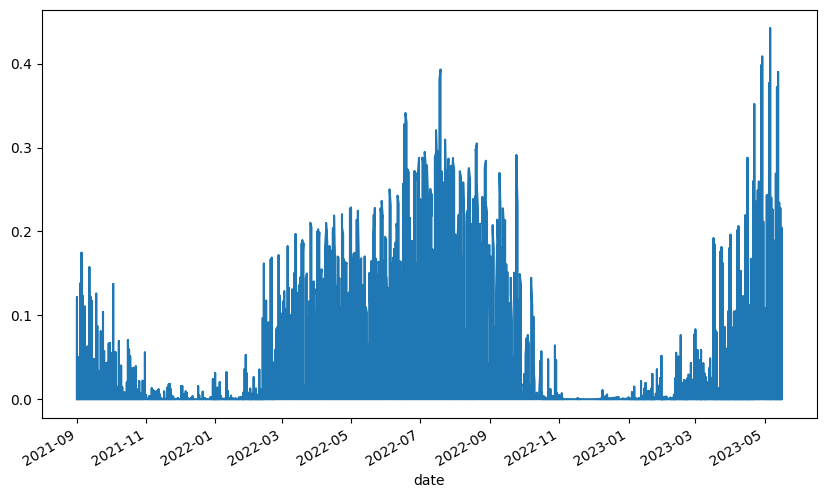

In [156]:
data.loc[data.is_consumption==0].set_index("date").production_per_cap_unit.plot(figsize=(10,6));

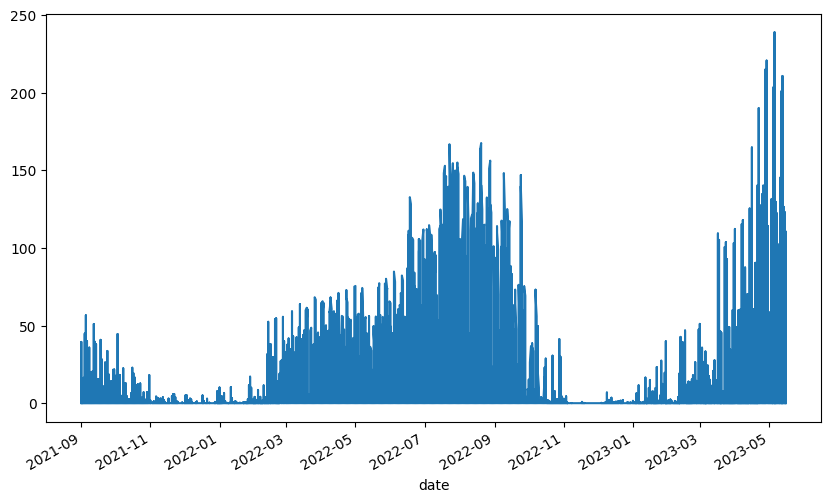

In [157]:
data.loc[data.is_consumption==0].set_index("date").target.plot(figsize=(10,6));

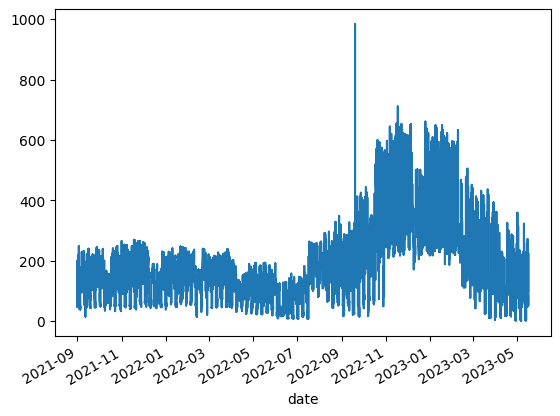

In [158]:
data.loc[data.is_consumption==1].set_index("date").target.plot();